# Customer Segmentation

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading the data

In [2]:
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Cleaning the data

In [3]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## EDA

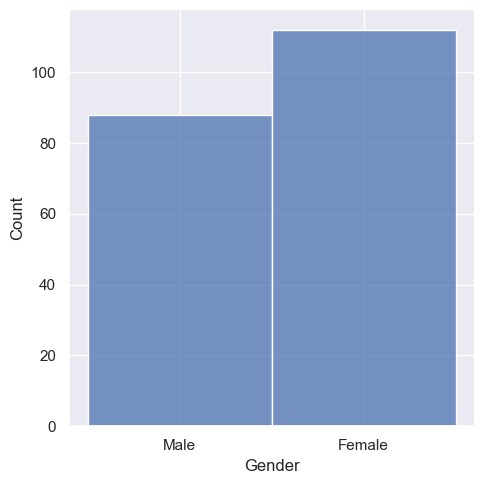

In [18]:
sns.displot(data["Gender"])

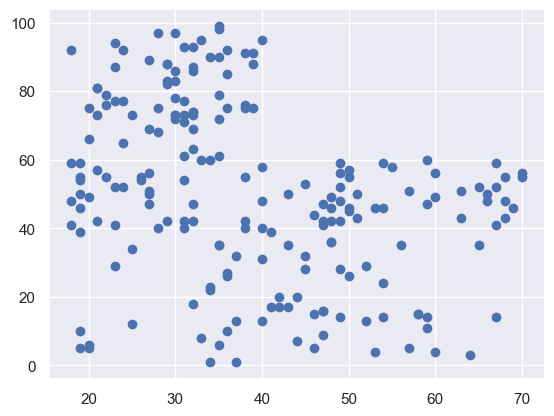

In [5]:
plt.scatter(x=data["Age"],y=data["Spending Score (1-100)"])


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## KMeans

### Scaling the data

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
x=data[["Annual Income (k$)","Spending Score (1-100)"]]

In [9]:
scaler.fit(x)
x_scaled=scaler.fit_transform(x)

In [10]:
wcss=[]
for i in range (1,10):
    kmeans_temp=KMeans(i)
    kmeans_temp.fit(x_scaled)
    kmeans_temp_wcss=kmeans_temp.inertia_
    wcss.append(kmeans_temp_wcss)

C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\

## Elbow Method

Text(0, 0.5, 'WCSS')

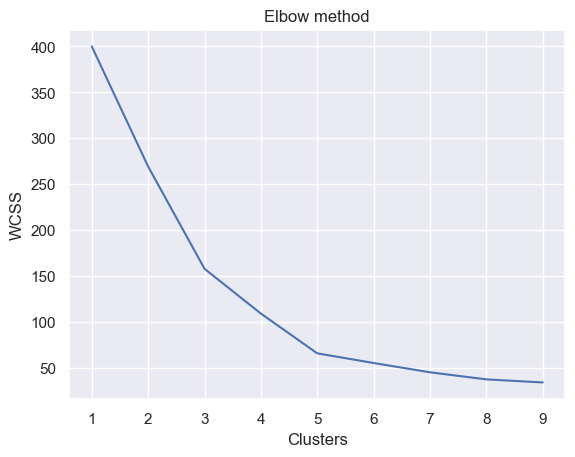

In [11]:
plt.plot(range(1,10),wcss)
plt.title("Elbow method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")

I can say 5 is a perfect cluster

In [12]:
kmeans=KMeans(5)
kmeans.fit(x_scaled)
clusters=kmeans.fit_predict(x_scaled)

C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
data["Clusters"]=clusters
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3


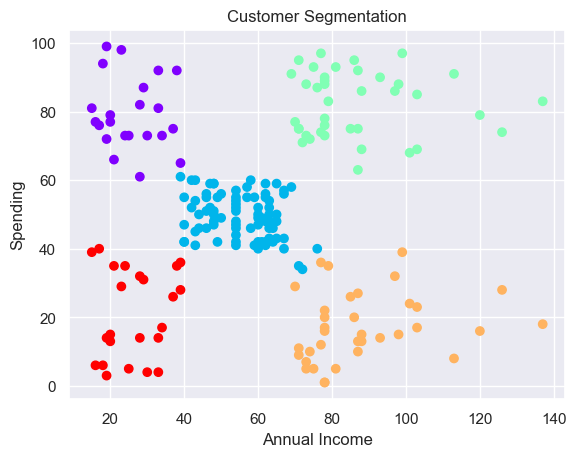

In [14]:
plt.scatter(x=data["Annual Income (k$)"],y=data["Spending Score (1-100)"],c=data["Clusters"],cmap="rainbow")
plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending")
plt.show()

### From this we can say there are 5 types of people
1 . Purple -> Low Income & High Spender<br>
2 . Blue-> Mid Income & Mid Spender<br>
3 . Red -> Low Income & Low Spender<br>
4 . Orange -> High Income & Low Spender<br>
5 . Green -> High Income & High Spender<br>